# Time Series Analysis of SuperWASP
This time series analysis of SuperWASP data was an attempt at measuring the rotation period of the M-type star GJ 3942.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.timeseries import LombScargle
import lightkurve as lk

## Rotation Period
Our rotation period used is that of a best-fit frequency, while the recorded rotation period is 16.3 days in <a href="https://ui.adsabs.harvard.edu/abs/2017A%26A...608A..63P/abstract">Perger et al. (2021)</a>. Within the TESS time series analysis, a best-fit frequency of 15.7 was found and used. The fonts and sizes for plots are also stated here.

In [2]:
# Input Signal (Best-Fit)
rp = 15.7

# Fonts and Sizes
figsize = (9, 5)
title_font = 18
label_font = 14
tick_font = 12

## SuperWASP Dataset

We define a variable to contain the data from SuperWASP. The file path would need to be adjusted based on where you have the file.

In [3]:
data = "/Users/andrewandmatthewfonseca/Downloads/plot.tbl"
table = pd.read_table(data, comment='#', delim_whitespace=True)
colnames = ['HJD', 'TAMMAG2', 'T']
print(table)

          \fixlen               =             T
0        |set|HJD        |TAMMAG2             |
1     |int|double         |double             |
2               0  2453837.533565  1.015264e+01
3               0  2453837.544664  1.015876e+01
4               0  2453837.549965  1.017314e+01
...           ...             ...           ...
7369            0  2454586.729572  1.021606e+01
7370            0  2454586.731273  1.019219e+01
7371            0  2454586.731713  1.020349e+01
7372            0  2454586.734641  1.022221e+01
7373            0  2454586.735081  1.021718e+01

[7374 rows x 3 columns]


## Scattor Plot

This plots the SuperWASP dataset into a scatter plot. This shows the distribution of the data.

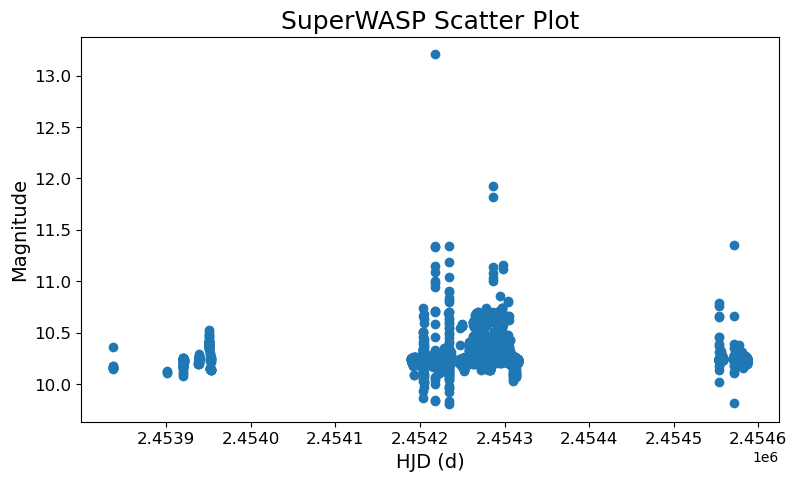

In [4]:
# Loading SuperWASP data
set, jd, tammag2 = np.loadtxt(data, skiprows=3, unpack=True)

# Plotting
plt.figure(figsize=figsize)
plt.scatter(jd, tammag2)
plt.title('SuperWASP Scatter Plot', fontsize=title_font)
plt.xlabel('HJD (d)', fontsize=label_font)
plt.ylabel('Magnitude', fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.show()

## Histogram

We create a histogram of the time steps using the data. These time steps are in log base 10.

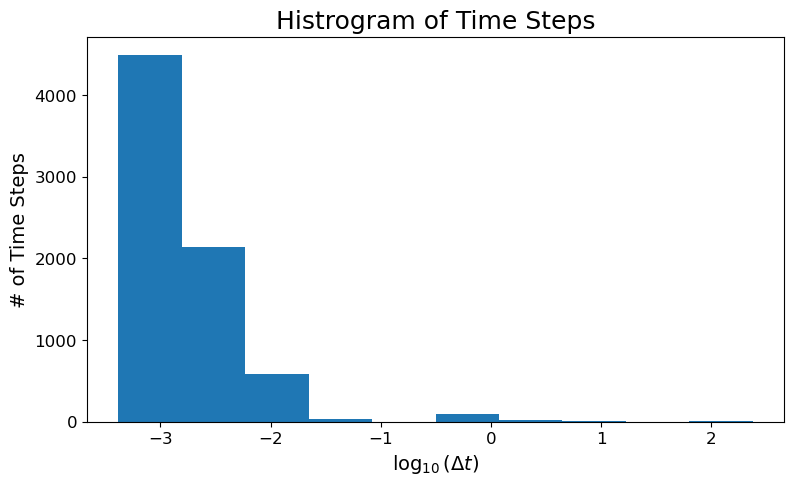

In [5]:
# Delta t 
dt = np.diff(jd)

# Plotting
plt.figure(figsize=figsize)
plt.hist(np.log10(dt))
plt.title('Histrogram of Time Steps', fontsize=title_font)
plt.xlabel(r"$\log_{10}(\Delta t)$", fontsize=label_font)
plt.ylabel('# of Time Steps', fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.show()

## Periodogram (Full Data)

This is a periodogram of the full SuperWASP data. This helps to visualize the frequency content of the signal from the data. Below the plot identifies the index of the dominant frequency, then gets the actual dominant frequency.

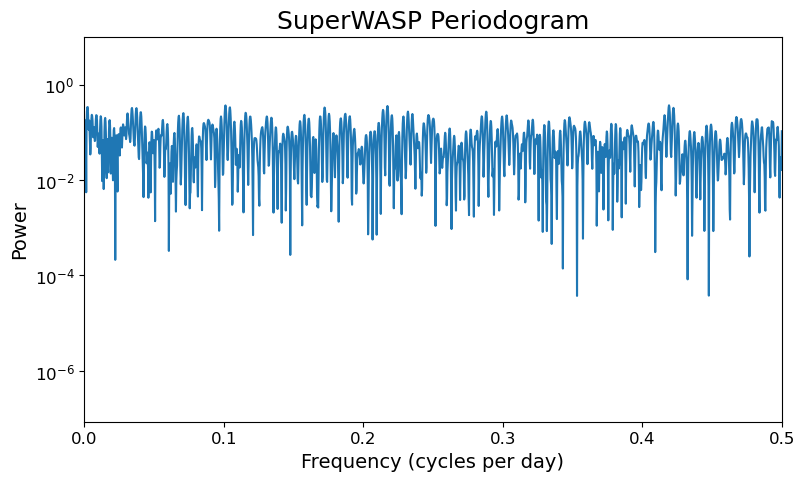

In [6]:
# Periodogram
frequency_sw, power_sw = LombScargle(jd - jd[0], tammag2, normalization="psd").autopower()

# Plotting
plt.figure(figsize=figsize)
plt.semilogy(frequency_sw, power_sw)
plt.title('SuperWASP Periodogram', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel('Power', fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.xlim(0, 0.5)
plt.show()

In [7]:
max_index_sw = np.argmax(power_sw)
print(frequency_sw[max_index_sw])
rotation_sw = 1/frequency_sw[max_index_sw]
rp/rotation_sw 
#This leads the rotation being 1, which then gives back the same number, 16.21875

1.002800960696906


15.743975082941423

## Binning

In this cell, we use the LightKurve module to create a lightcurve (time series of brightness) of the SuperWASP data in order to bin it. We plot these as scatter plots, log plots, and periodograms below. The columns of the binned lightcurve are time, flux, flux_err, time_bin_start, and time_bin_size. The binned lightcurve is 750 rows long.

    Attribute                       Description                 
------------------ ---------------------------------------------
has_masked_columns                                         False
 has_masked_values                                         False
 has_mixin_columns                                          True
            masked                                         False
          colnames                                 list length 5
           indices                                 list length 1
              flux                                  array (750,)
          flux_err                                  array (750,)
           columns    <class 'astropy.table.table.TableColumns'>
             dtype              <class 'numpy.dtypes.VoidDType'>
         formatter <class 'astropy.table.pprint.TableFormatter'>
            groups    <class 'astropy.table.groups.TableGroups'>
              iloc       <class 'astropy.table.index.TableILoc'>
               loc       

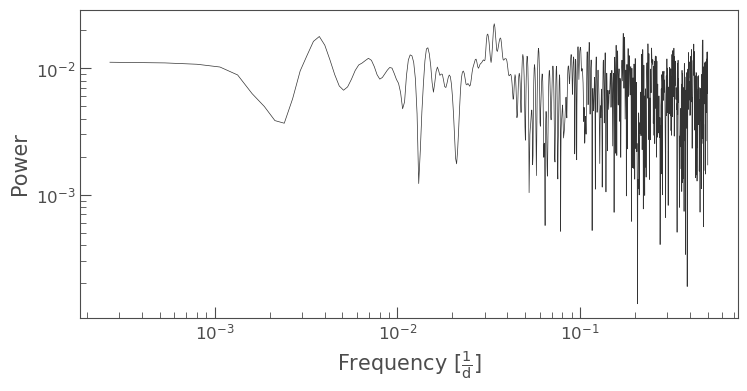

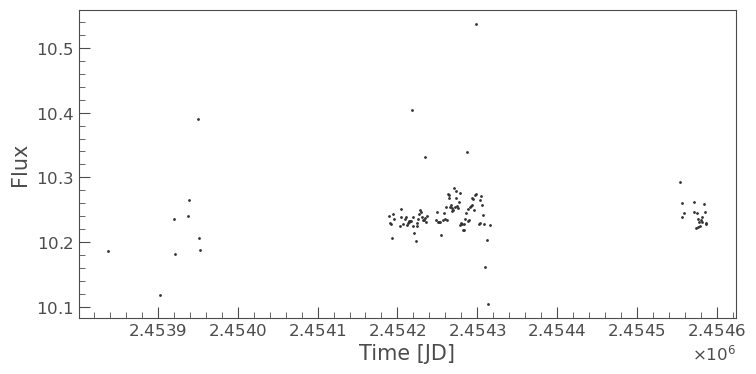

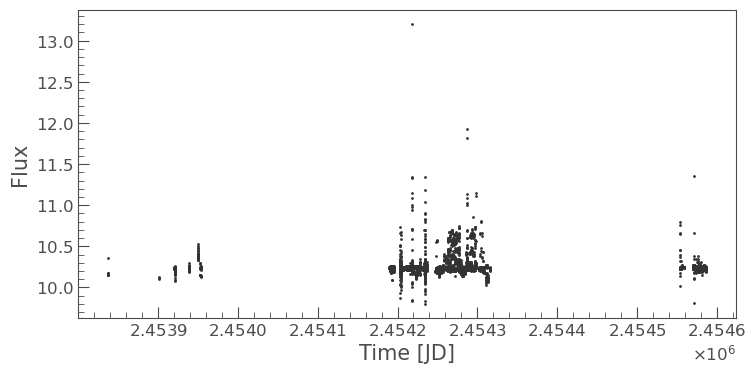

In [8]:
# Original binned lightcurve
my_lightcurve = lk.LightCurve(time=jd, flux=tammag2)
my_lightcurve_bin = my_lightcurve.bin(time_bin_size=1) # bin size of 1 day
lightcurve_periodogram = my_lightcurve_bin.to_periodogram(method='lombscargle')
lightcurve_periodogram.plot(scale='log')
my_lightcurve_bin.scatter()
my_lightcurve.scatter()
my_lightcurve_bin.show_properties()
lightcurve_periodogram.show_properties()
#print(my_lightcurve_bin)
#print(my_lightcurve.flux)
#print(tammag2)

## Cutting

Here we cut the SuperWASP data of outlier data, that isn't the main data, to used in the spectral windows in contrast to the full data. This does not use the binned data from the lightcurve.

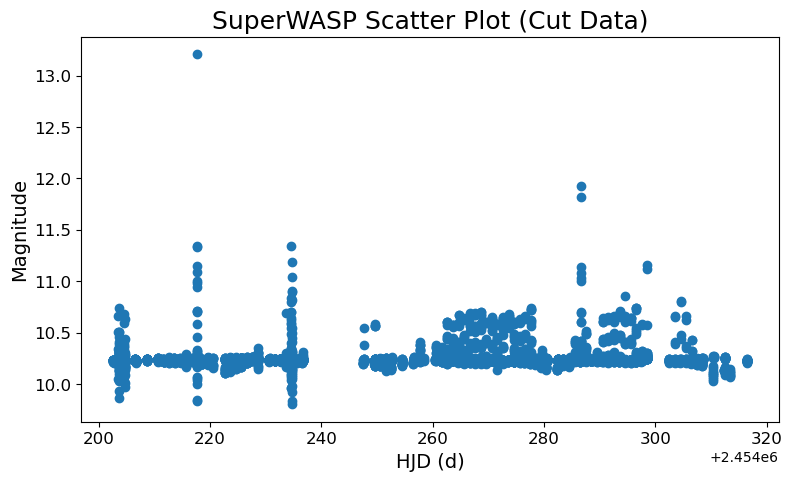

In [9]:
# Cutting data to have only main data
main_data = []
for j in range(len(jd)):
    if (jd[j] > 2.4542e6) and (jd[j] < 2.4544e6):
        main_data.append(j)
main_jd = jd[main_data]
main_tammag2 = tammag2[main_data]

# Plotting
plt.figure(figsize=figsize)
plt.scatter(main_jd, main_tammag2)
plt.title('SuperWASP Scatter Plot (Cut Data)', fontsize=title_font)
plt.xlabel("HJD (d)", fontsize=label_font)
plt.ylabel('Magnitude', fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.show()

## Spectral Window (Full Data)

We create a spectral window out of the full data, without the cutting or binning. We use a nyquist factor of 2.

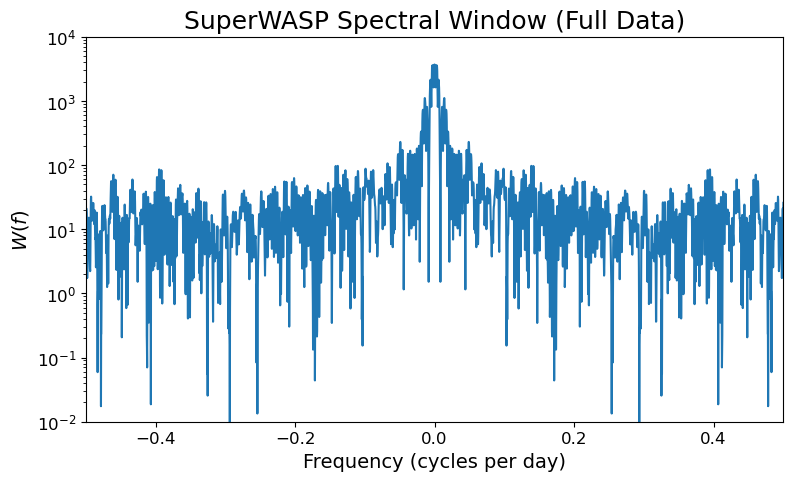

In [10]:
# Spectral Window (Full Data)
freq, specwin = LombScargle(jd - jd[0], np.ones(len(jd)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

# Plotting
plt.figure(figsize=figsize)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.title('SuperWASP Spectral Window (Full Data)', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.xlim(-0.5, 0.5)
plt.ylim(1e-2, 1e4)
plt.show()

## Spectral Window (Cut Data)

We create a spectral window out of the cut data that was created above. We can contrast this with the full data spectral window above as well. Using a nyquist factor of 2.

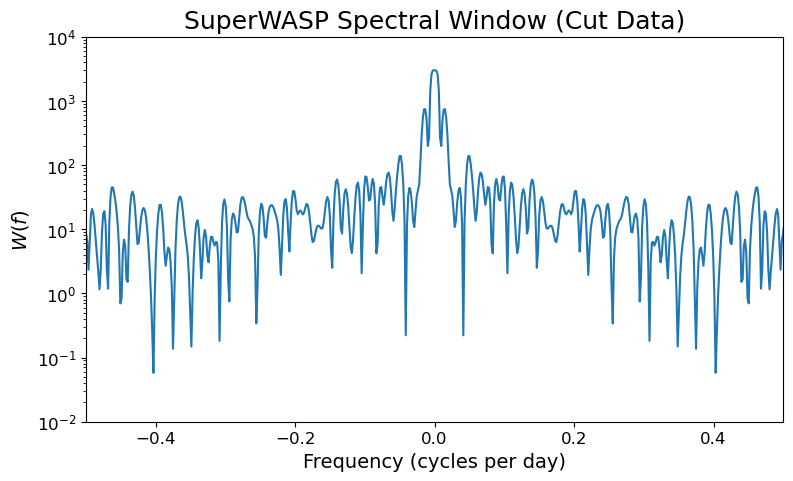

In [11]:
# Spectral Window (Cut Data)
freq, specwin = LombScargle(main_jd - main_jd[0], np.ones(len(main_jd)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

# Plotting
plt.figure(figsize=figsize)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.title('SuperWASP Spectral Window (Cut Data)', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.xlim(-0.5, 0.5)
plt.ylim(1e-2, 1e4)
plt.show()

## Periodogram (Cut Data)

Using the cut data that was obtained above, we create a periodogram. It follows the form of the periodogram made previously.

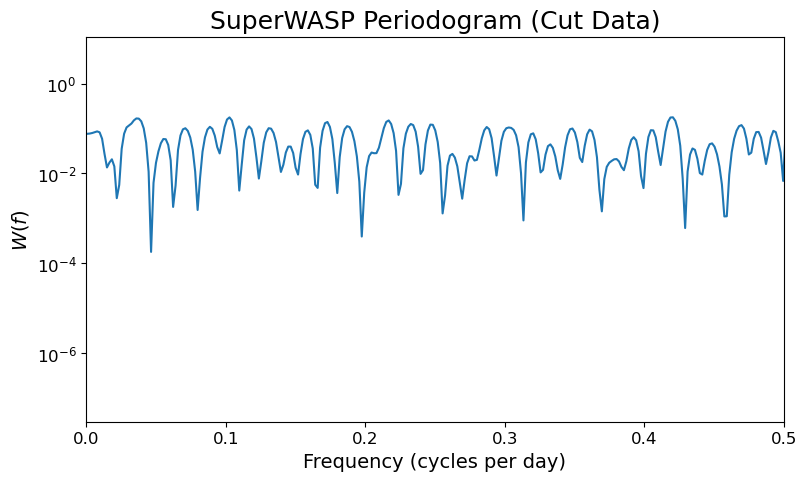

In [12]:
# Periodogram (Cut Data)
cut_frequency, cut_power = LombScargle(main_jd - main_jd[0], main_tammag2, normalization="psd").autopower()

# Plotting
plt.figure(figsize=figsize)
plt.semilogy(cut_frequency, cut_power)
plt.title('SuperWASP Periodogram (Cut Data)', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.xlim(0, 0.5)
plt.show()

## Pseudo-Window (Uncut, Unbinned)

This is the pseudo-window using the uncut, unbinned data. This uses a nyquist factor of 2.

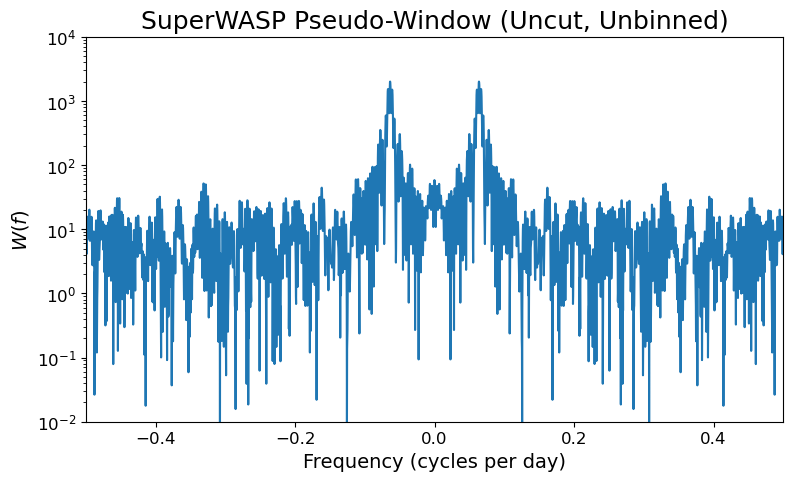

In [13]:
# Pesudo-window (uncut, unbinned)
freq, specwin = LombScargle(jd - jd[0], np.sin(2*np.pi*(jd-jd[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

# Plotting
plt.figure(figsize=figsize)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.title('SuperWASP Pseudo-Window (Uncut, Unbinned)', fontsize=title_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.xlim(-0.5, 0.5)
plt.ylim(1e-2, 1e4)
plt.show()

## Removing NaN

We remove NaN data values from the binned lightcurve. These were NaN values were not used in the original plotting previously, but they have now been removed with this code below. They are plotted again here as well.

     time             flux        ... time_bin_start time_bin_size
                                  ...                      d      
-------------- ------------------ ... -------------- -------------
2453838.033565        10.18547625 ... 2453837.533565           1.0
2453902.033565 10.117193333333333 ... 2453901.533565           1.0
2453920.033565 10.235812500000002 ... 2453919.533565           1.0
2453921.033565 10.181635652173911 ... 2453920.533565           1.0
2453938.033565 10.240692333333335 ... 2453937.533565           1.0
2453939.033565         10.2654525 ... 2453938.533565           1.0
           ...                ... ...            ...           ...
2454580.033565 10.233751630434782 ... 2454579.533565           1.0
2454581.033565 10.238334788732395 ... 2454580.533565           1.0
2454582.033565        10.23080625 ... 2454581.533565           1.0
2454584.033565 10.258438333333332 ... 2454583.533565           1.0
2454585.033565 10.245749215686274 ... 2454584.533565          

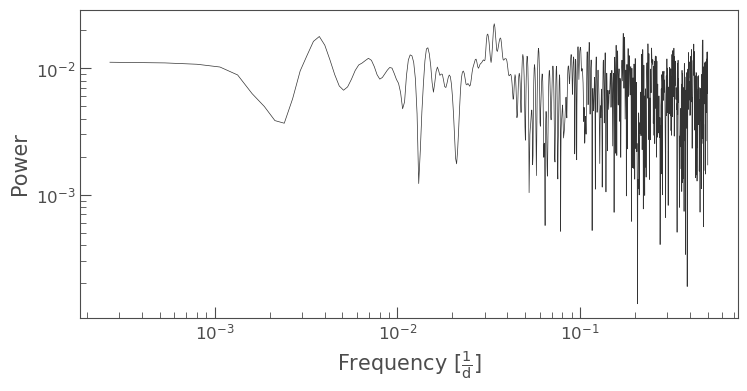

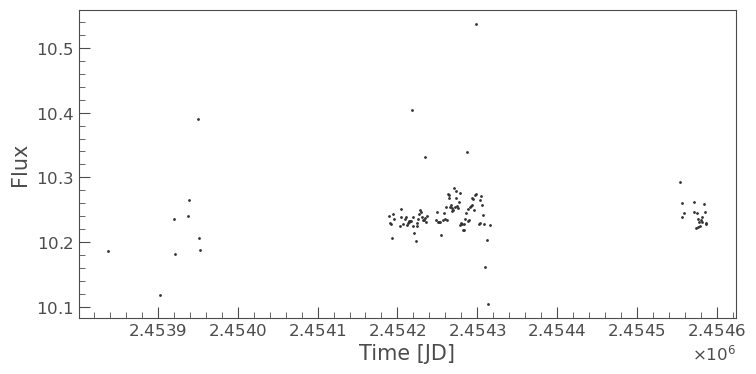

In [14]:
# Removing NaN data from binned lightcurve (rename to remove confusion)
my_lightcurve_bin_new = my_lightcurve_bin.remove_nans()
lightcurve_periodogram_new = my_lightcurve_bin_new.to_periodogram(method='lombscargle')
lightcurve_periodogram_new.plot(scale='log')
my_lightcurve_bin_new.scatter()
print(my_lightcurve_bin_new) #To untruncate, using a for loop to iterate through the list
# The original binned lightcurve didnt plot the NaN's anyways; it would be the same plot

## Spectral Window (Binned)

Here we create the spectral window of the binned data. We create a bin_time, as well as a negative and positive x limit to use in the binned spectral window and the binned pseudo-window. We create a positive and negative vertical line at the signal for a rotation period of 29.5 days. This is the period associated with the maximum frequency found further in this notebook. A nyquist factor of 2 is used.

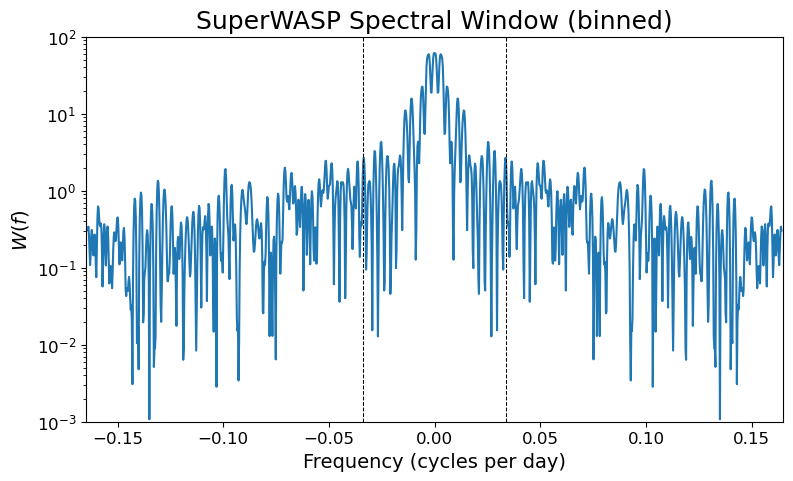

In [15]:
# Spectral-Window for binned Lightcurve
bin_time = my_lightcurve_bin_new.time.value
negative_xlim = -0.165
positive_xlim = 0.165

# Spectral Window (Binned)
freq, specwin = LombScargle(bin_time - bin_time[0], np.ones(len(bin_time)), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

# Plotting
plt.figure(figsize=figsize)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.title("SuperWASP Spectral Window (binned)", fontsize=title_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.xlim(negative_xlim, positive_xlim)
plt.ylim(1e-3, 1e2)
plt.axvline(1/29.5, linestyle='--', linewidth=0.75, color='black')
plt.axvline(-(1/29.5), linestyle='--', linewidth=0.75, color='black')

## Pseudo-Window (Binned)

Using the preivously stated variables, we can create a pseudo-window for the binned data with vertical lines at the positive and negative signal of the rotation period. A nyquist factor of 2 is used. The second plot below this is the same pseudo-window plot with binning, but within only the positive domain.

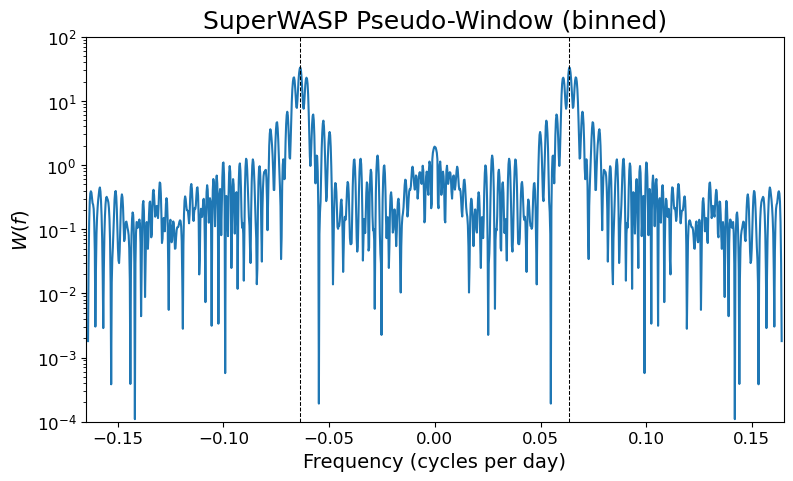

In [16]:
# Pseudo-Window (Binned)
freq, specwin = LombScargle(bin_time - bin_time[0], np.sin(2*np.pi*(bin_time-bin_time[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

# Plotting
plt.figure(figsize=figsize)
plt.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
plt.title("SuperWASP Pseudo-Window (binned)", fontsize=title_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
plt.xlim(negative_xlim, positive_xlim)
plt.ylim(1e-4, 1e2)
plt.axvline(1/rp, linestyle='--', linewidth=0.75, color='black') 
plt.axvline(-(1/rp), linestyle='--', linewidth=0.75, color='black')

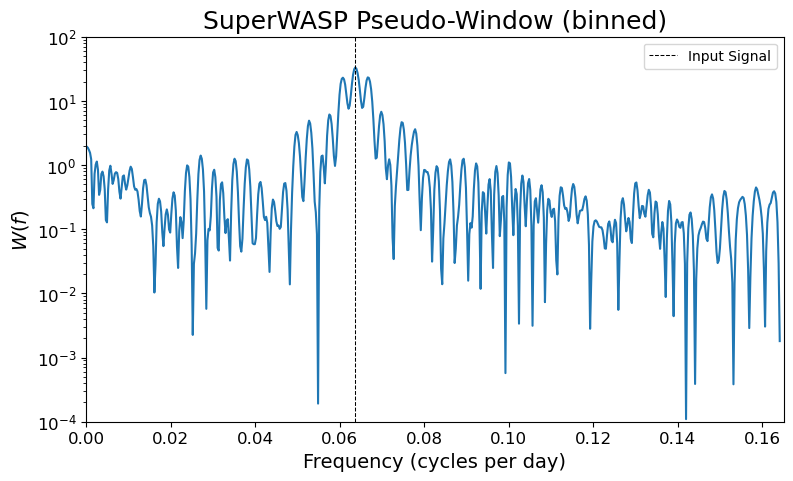

In [17]:
#Positive frequencies pseudo-window plot

# Pseudo-Window for binned Lightcurve
plt.figure(figsize=(9, 5))
plt.title("SuperWASP Pseudo-Window (binned)", fontsize=title_font)
plt.ylabel(r"$W(f)$", fontsize=label_font)
plt.xlabel(r"Frequency (cycles per day)", fontsize=label_font)
plt.tick_params(axis='both', which='major', labelsize=tick_font)
freq, specwin = LombScargle(bin_time - bin_time[0], np.sin(2*np.pi*(bin_time-bin_time[0])/rp), center_data = False, fit_mean = False, normalization = 'psd').autopower(nyquist_factor=2)

# Selecting only positive frequencies
positive_freq = freq[freq > 0]
positive_specwin = specwin[freq > 0]

plt.semilogy(positive_freq, positive_specwin)
plt.xlim(0, positive_xlim)
plt.ylim(1e-4, 1e2)
#make these lines a dotted-line for the harmonics
plt.axvline(1/rp, linestyle='--', linewidth=0.75, color='black', label='Input Signal') # positive rotation period vline
#plt.axvline(-(1/rp), linestyle='--', linewidth=0.75, color='black') # negative rotaiton period vline
plt.legend()

## Maximum Frequency

Here we calculate a maximum frequency using the lightcurve periodogram made previously, as well as the frequency_at_max_power function. We get a period associated with the maximum frequency of 29.5 days.

In [18]:
# Maximum frequency and period
frequency_peak = lightcurve_periodogram.frequency_at_max_power
period_associated = 1 / frequency_peak
print("Frequency of Maximum Power (Peak):", frequency_peak)
print("Period associated with the peak:", period_associated)

Frequency of Maximum Power (Peak): 0.033911882510013355 1 / d
Period associated with the peak: 29.48818897637795 d


# Stacked Pseudo-Window Plots

This is depercated code to stack two plots, particularly the pseudo-window plots for SuperWASP and Hipparcos, into one image. This does not work without both of the datasets. Currently, this will not render the Hipparcos pseudo-window plot.

In [ ]:
# Figure with stacked pseudo-window plots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=figsize)


# First plot (SuperWASP)
ax1.set_title("SuperWASP Pseudo-Window (binned)")
ax1.set_ylabel(r"$W(f)$")
freq, specwin = LombScargle(bin_time - bin_time[0], np.sin(2 * np.pi * (bin_time - bin_time[0]) / rp), center_data=False, fit_mean=False, normalization='psd').autopower(nyquist_factor=2)
ax1.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
ax1.set_ylim(1e-2, 1e2)
ax1.axvline(1 / rp, linestyle='--', linewidth=0.75, color='black')
ax1.axvline(-(1 / rp), linestyle='--', linewidth=0.75, color='black')

# Second Plot (Hipparcos)
ax2.set_title("Hipparcos Pseudo-Window (clipped)")
ax2.set_ylabel(r"$W(f)$")
ax2.set_xlabel(r"Frequency (cycles per day)")
freq, specwin = LombScargle(bjd - bjd[0], np.sin(2 * np.pi * (bjd - bjd[0]) / rp), center_data=False, fit_mean=False, normalization='psd').autopower(nyquist_factor=2)
ax2.semilogy(np.concatenate((-freq[::-1], freq[1:])), np.concatenate((specwin[::-1], specwin[1:])))
ax2.set_xlim(-0.1, 0.1)
ax2.axvline(1 / rp, linestyle='--', linewidth=0.75, color='black')
ax2.axvline(-(1 / rp), linestyle='--', linewidth=0.75, color='black')

# Adjust layout (prevent overlap)
plt.tight_layout()

plt.show()

## Sources

Data Table:

 - https://exoplanetarchive.ipac.caltech.edu/cgi-bin/ExoOverview/nph-ExoOverview?objname=GJ%203942&type=EXO_INVENTORY&radius=30&all

Filter:

 - http://svo2.cab.inta-csic.es/theory/fps/index.php?id=WASP/SuperWASP.SW&&mode=browse&gname=WASP&gname2=SuperWASP#filter